# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Accelerometer Gyro Mobile Phone menggunakan KNN

<b>Kelompok: </b>

Anggota:
1. Zahra Amiera Putri Sailendra - 1301223225
2. Ralphi Adam Subekti - 1301204190

## Pendahuluan
Dataset yang digunakan merupakan data yang dikumpulkan pada tahun 2022, di Universitas King Saud di Riyadh. Data ini akan digunakan untuk mengenali aktivitas manusia menggunakan sensor IMU ponsel (*Accelerometer* dan *Gyroscope*). Aktivitas ini diklasifikasikan menjadi *walking* atau *stop*. *Walking* ditandai dengan 1 pada kolom Activity, sedangkan *stop* ditandai dengan 0.

Kami melakukan pengecekan apakah ada data yang kosong atau tidak pada dataset yang diberikan. Kemudian dilakukan drop kepada salah satu kolom yang dirasa tidak perlu digunakan untuk pemodelan. Untuk pembagiannya, kami membagi menjadi 80% *training* dan 20% *testing*.

### Data Preprocessing

In [1]:
# tools
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set_style("darkgrid")


In [3]:
# Load dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')


In [4]:
# Show your data in tabular or other visualization ways
# Melihat sekilas data
print("------HEAD------")
print(data.head())

print("------INFO------")
data.info()

print("----DESCRIPTION----")
data.describe()

# note: ada koordinat x y z untuk accelerometer
# dan ada koordinat x y z untuk gyroscope

------HEAD------
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  
------INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6 

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [5]:
# Data Preprocessing
# Check apakah ada data yang kosong
print(data.isnull().sum())

accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64


In [6]:
# mengganti nama target data. awalnya 'Activity', diganti menjadi 'target'
data.rename(columns = {'Activity':'target'}, inplace = True)

In [7]:
# melihat kolom 'Activity' sudah terganti menjadi 'target'
print(data.head())

       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [8]:
# mengecek apakah ada data duplicate berdasarkan semua variabel
data.loc[data.duplicated()]

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,target
19544,-0.523911,3.544629,8.587043,0.206907,-0.206078,0.118522,04:03.5,1
19545,-0.948278,3.616779,9.574091,-0.081989,-0.193955,-0.180430,04:03.6,1
19546,-0.579744,3.490591,8.026459,-0.821895,-0.253450,-0.542457,04:03.7,1
19547,-0.571811,3.088677,9.245224,0.005927,-0.356734,-0.041687,04:03.8,1
19548,-0.914748,2.908152,10.521171,0.017502,-0.002792,-0.058824,04:03.9,1
...,...,...,...,...,...,...,...,...
19683,-0.104333,2.985542,7.597301,-0.152117,-0.263568,0.134687,04:17.4,1
19684,-0.183069,3.415597,10.007439,0.190996,0.042115,0.346975,04:17.5,1
19685,-1.347797,3.003654,11.049572,0.241130,0.072481,0.376511,04:17.6,1
19686,-1.026266,2.315984,9.469608,0.114167,0.132924,0.192084,04:17.7,1


In [9]:
# memastikan itu duplicate secara semua variabel
data.loc[data.duplicated(subset=['accX','accY','accZ','gyroX','gyroY','gyroZ','timestamp','target'])]

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,target
19544,-0.523911,3.544629,8.587043,0.206907,-0.206078,0.118522,04:03.5,1
19545,-0.948278,3.616779,9.574091,-0.081989,-0.193955,-0.180430,04:03.6,1
19546,-0.579744,3.490591,8.026459,-0.821895,-0.253450,-0.542457,04:03.7,1
19547,-0.571811,3.088677,9.245224,0.005927,-0.356734,-0.041687,04:03.8,1
19548,-0.914748,2.908152,10.521171,0.017502,-0.002792,-0.058824,04:03.9,1
...,...,...,...,...,...,...,...,...
19683,-0.104333,2.985542,7.597301,-0.152117,-0.263568,0.134687,04:17.4,1
19684,-0.183069,3.415597,10.007439,0.190996,0.042115,0.346975,04:17.5,1
19685,-1.347797,3.003654,11.049572,0.241130,0.072481,0.376511,04:17.6,1
19686,-1.026266,2.315984,9.469608,0.114167,0.132924,0.192084,04:17.7,1


In [10]:
# drop data duplicate, dengan tetap keep data yang pertama muncul
data.drop_duplicates(keep= 'first', inplace=True)

In [11]:
# mengecek apakah ada data duplicate berdasarkan semua variabel
data.loc[data.duplicated()]

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,target


In [12]:
data

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,target
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


In [13]:
# melakukan reset index
data.reset_index(drop=True)

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,target
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31842,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31843,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31844,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31845,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


In [14]:
# melakukan drop timestamp, karena tidak relevan dengan target variabel
data.drop(['timestamp'], axis=1, inplace=True)

In [15]:
# melihat kolom timestamp sudah ke drop
print(data.head())

       accX      accY      accZ     gyroX     gyroY     gyroZ  target
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539       1
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130       1
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287       1
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433       1
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943       1


In [16]:
# mau lihat persebaran data berdasarkan target
data.target.value_counts()

target
1    31276
0      571
Name: count, dtype: int64

array([[<Axes: title={'center': 'target'}>]], dtype=object)

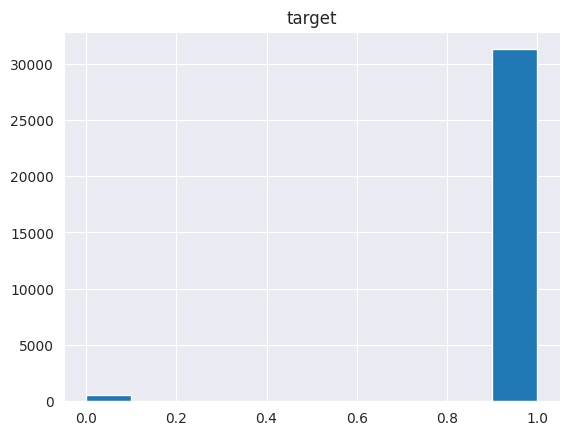

In [18]:
data.hist('target')

Pada 'target' 0 artinya stop sedangkan 1 artinya walking

Karena jumlah antara data stop dan walking terdapat ketidak seimbangan yang sangat besar, maka akan dilakukan oversampling pada data (data train)

Teknik oversampling yang kami pakai disini adalah SMOTE

**SMOTE**

Pengembangan dari metode oversampling, dimana cara kerja metode ini adalah dengan membangkitkan sampel baru yang berasal dari kelas minoritas untuk membuat proporsi data menjadi lebih seimbang dengan cara sampling ulang sampel kelas minoritas (Siringoringo, 2018).

Dengan metode ini dapat membuat data-set menjadi seimbang tanpa terlalu overfit, yaitu dengan membuat sample synthetic daripada dengan melakukan duplicate sample.

In [ ]:
# Data Splitting
# memisahkan target
x = data.drop(columns='target')
y = data.target

In [ ]:
# membuat train dan test sets
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  25477
x_test =  6370
y_train =  25477
y_test =  6370


In [ ]:
# mulai melakukan SMOTE
# instalasi imblearn
!pip install imblearn

In [ ]:
# import
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# dilakukan oversampling menggunakan teknik SMOTE, dan menyimpan pada array baru (x_train_smote, y_train_smote)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 25019, 0: 458})
After SMOTE : Counter({1: 25019, 0: 25019})


### Exploratory Data Analysis

<Axes: >

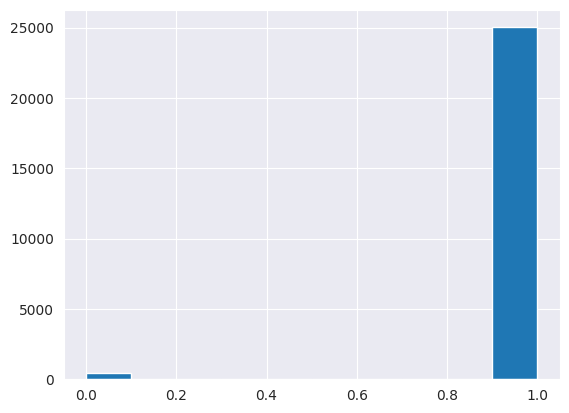

In [ ]:
# Histogtram untuk melihat perbandingan banyak data yg "jalan" dan "diam" sebelum di SMOTE
y_train.hist()

<Axes: >

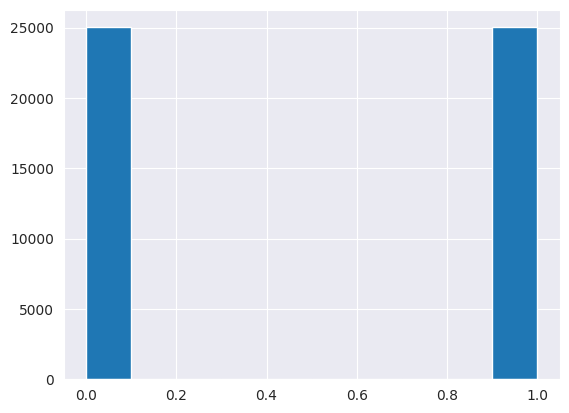

In [ ]:
# Histogtram untuk melihat perbandingan banyak data yg "jalan" dan "diam" setelah di SMOTE
y_train_smote.hist()

<Axes: >

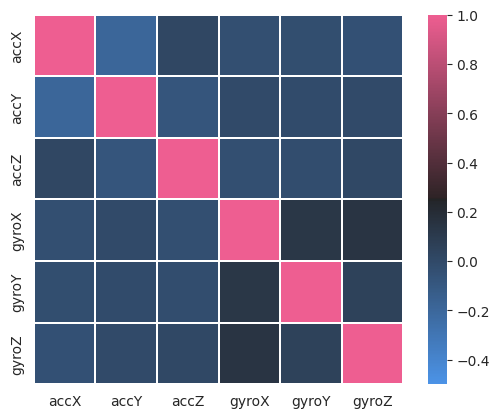

In [ ]:
# heatmap, untuk melihat korelasi antara variabel.

corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

Accelerometer mengukur percepatan yang dialami sensor dalam tiga sumbu x, y, dan z relatif terhadap dirinya sendiri.Giroskop mengukur rotasi yang dialami sensor pada tiga sumbu x, y, dan z. Keenam variable tidak secara langsung berhubungan (tidak ada hubungan sebab-akibat), maka korelasi antara variabel tidaklah kuat.

## Metode yang Digunakan: KNN
KNN merupakan sebuah model/metode yang digunakan untuk klasifikasi dan regresi berdasarkan prinsip kedekatan atau kemiripan data baru dengan data yang sudah ada. Algoritma ini bekerja dengan menentukan jumlah 'k' tetangga terdekat, kemudian menghitung jarak antara data baru dan setiap data dalam dataset menggunakan metrik jarak seperti Euclidean atau Manhattan. Setelah itu, KNN mengurutkan data berdasarkan jarak terdekat dan memilih 'k' tetangga terdekat untuk klasifikasi atau prediksi.

Untuk parameter, digunakan n_neighbors=5.

Dilakukan 3 model training. Yang pertama yaitu model training dengan data train tanpa SMOTE. Yang ke-dua yaitu model training dengan data train dengan SMOTE. Lalu yang terakhir, yaitu model training dengan data train yang sudah dilakukan SMOTE padanya, sekaligus melakukan hyperparameter tuning dan cross-validation.

In [ ]:
# Model Training TANPA smote
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Model Testing and Evaluation
# Show the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
pd.crosstab(y_test, y_pred)

Accuracy: 0.9833594976452119
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.19      0.28       113
           1       0.99      1.00      0.99      6257

    accuracy                           0.98      6370
   macro avg       0.79      0.59      0.64      6370
weighted avg       0.98      0.98      0.98      6370



col_0,0,1
target,,
0,21,92
1,14,6243


In [ ]:
# Model Training dengan SMOTE
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_smote, y_train_smote)

y_pred = knn.predict(x_test)

# Model Testing and Evaluation
# Show the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
pd.crosstab(y_test, y_pred)

Accuracy: 0.9271585557299843
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.70      0.25       113
           1       0.99      0.93      0.96      6257

    accuracy                           0.93      6370
   macro avg       0.57      0.82      0.61      6370
weighted avg       0.98      0.93      0.95      6370



col_0,0,1
target,,
0,79,34
1,430,5827


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

knn_params = {
    "n_neighbors": range(1, 10, 1),
    "metric" : ['nan_euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

#grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(x_train_smote, y_train_smote)

#best model
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(x_train_smote, y_train_smote)
y_pred = final_model.predict(x_test)

#summarize results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.21      0.50      0.30       113
           1       0.99      0.97      0.98      6257

    accuracy                           0.96      6370
   macro avg       0.60      0.73      0.64      6370
weighted avg       0.98      0.96      0.97      6370

[[  56   57]
 [ 207 6050]]
{'metric': 'nan_euclidean', 'n_neighbors': 1}


Dilakukan hyperparameter tuning menggunakan grid-search dengan cross-validation. Disini didefinisikan hyperparameter untuk model KNN, yaitu mencoba untuk mempertimbangkan jumlah tetangga dengan nilai berkisar dari satu sampai 10 dengan kenaikan 1.

Dan pada cross validationnya data train dibagi menjadi beberapa bagian dan model dilatih serta diuji beberapa kali untuk setiap kombinasi parameter. Dalam hal ini data di spits sebanyak lima fold dan dua kali pengulangan yang berarti setiap kombinasi parameter diuji 10 kali.

Terakhir, dibangun model final dengan hyperparameter terbaik.

## Hasil dan Analisis


Disini kami mengambil model terakhir, yaitu model training dengan data train yang sudah dilakukan SMOTE padanya, sekaligus melakukan hyperparameter tuning dan cross-validation.


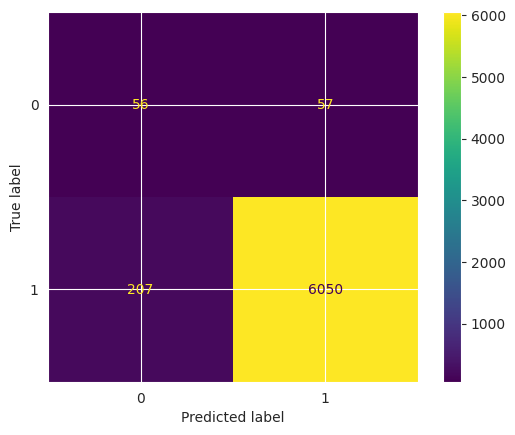

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

# Displaying the confusion matrix values
conf_matrix_display.plot()

- True Positives (TP) sebanyak 6050
- True Negatives (TN) sebanyak 55
- False Positives (FP) sebanyak 57
- False Negatives (FN) sebanyak 267

Akurasi yang didapat dari model ini adalah sekitar 96%, menunjukkan performa yang sangat baik secara keseluruhan. Precision untuk walking adalah sekitar 99%, sedangkan recall mencapai 97%, yang berarti model sangat efektif dalam mengidentifikasi kelas walking. F1-Score untuk kelas walking adalah sekitar 98%, mencerminkan keseimbangan antara precision dan recall yang baik.

Berbanding dengan performa model untuk kelas stop yg lebih rendah, dengan presisi hanya 21%, recall 50%, dan F1-Score 30%, menunjukkan kesulitan model dalam mengklasifikasikan kelas stop dengan benar.

## Kesimpulan
Berdasarkan hasil dan analisis, dapat disimpulkan bahwa model klasifikasi memiliki performa yang sangat baik dalam mengidentifikasi aktivitas walking. Namun, ketika kita melihat performa model dalam mengidentifikasi aktivitas stop, hal ini menunjukkan bahwa model memiliki kesulitan dalam mengklasifikasikan aktivitas stop dengan benar, sehingga harus melalui proses SMOTE terlebih dahulu terhadap data training dan data testing. Dan tentunya melakukan cross validation melalui metode Hyperparameter tuning untuk meningkatkan akurasinya.
